In [63]:
import pandas as pd

In [65]:
df = pd.read_csv('../../data/clean_data/intermediate cleaned data/salaries_and_descriptions.csv', index_col = 0)
fd = pd.read_csv('../../data/clean_data/intermediate cleaned data/salaries_and_descriptions_and_gramcounts.csv', index_col = 0)

In [66]:
df.columns[84]

'upper_bound_salary'

In [67]:
df.isnull().sum()

Country                                                       0
Description                                                   0
Glassdoor Salary Estimate                                   212
Position_clean                                                0
Unnamed: 0.1                                                  0
base_pay                                                     61
bonus_pay                                                   209
cash_bonus                                                  516
company                                                       0
company_industry_Accounting                                  22
company_industry_Advertising & Marketing                      0
company_industry_Aerospace & Defense                          0
company_industry_Airlines                                   754
company_industry_Architectural & Engineering Services        22
company_industry_Banks & Credit Unions                        0
company_industry_Beauty & Personal Acces

In [68]:
df.columns

Index(['Country', 'Description', 'Glassdoor Salary Estimate', 'Position_clean',
       'Unnamed: 0.1', 'base_pay', 'bonus_pay', 'cash_bonus', 'company',
       'company_industry_Accounting',
       'company_industry_Advertising & Marketing',
       'company_industry_Aerospace & Defense', 'company_industry_Airlines',
       'company_industry_Architectural & Engineering Services',
       'company_industry_Banks & Credit Unions',
       'company_industry_Beauty & Personal Accessories Stores',
       'company_industry_Biotech & Pharmaceuticals',
       'company_industry_Brokerage Services',
       'company_industry_Building & Personnel Services',
       'company_industry_Cable, Internet & Telephone Providers',
       'company_industry_Chemical Manufacturing',
       'company_industry_Colleges & Universities',
       'company_industry_Computer Hardware & Software',
       'company_industry_Consulting',
       'company_industry_Department, Clothing, & Shoe Stores',
       'company_industry_E

In [69]:
df = df.drop(['Unnamed: 0.1'], axis = 1)

In [70]:
df[df.base_pay == df.salary].shape # ~44% of samples have 'base pay' == 'salary'

(376, 84)

## continuous/numerical variables - feature selection (base pay, bonus pay, cash bonus, stock bonus, lower bound, upper bound) w SALARY 

Use Pearson correlation / Spearman correlation, which are for *continuous/numerical variables only*.
Note that Pearson examines *linear* association bw variables, but Spearman examines *monotonic* (increasing or decreasing, but not necessarily linear) relationship.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# subset out continuous variables
cont_var = ['base_pay', 'bonus_pay', 'cash_bonus', 'lower_bound_salary', 'stock_bonus', 'upper_bound_salary', 'salary', 'company_rating' ]
df_cont = df[cont_var]

In [84]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

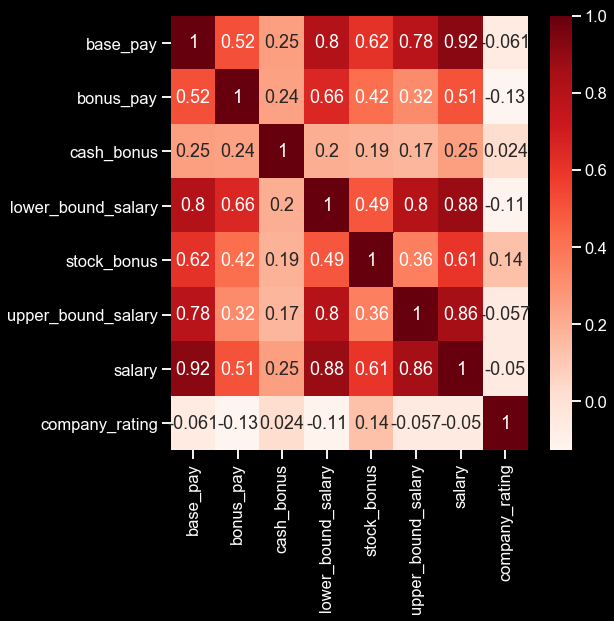

In [86]:
plt.figure(figsize=(8,8))
cor_pearson = df_cont.corr()
hm = sns.heatmap(cor_pearson, annot=True, cmap=plt.cm.Reds)
plt.show()
#plt.savefig('../../figures/exploratory_figures/corr_matrix.png')
#hm.savefig('../../figures/exploratory_figures/corr_matrix.png')
fig = hm.get_figure()
fig.savefig('../../figures/exploratory_figures/corr_matrix.png', transparent = True)

Use threshold of 0.5 (between continuous predictor and target 'salary) as criterion. 
So only correlation > 0.5 gets selected. Here that means 'cash bonus' gets dropped.

In [14]:
cor_y = cor_pearson['salary'] # correlation bw 'salary' and all other continuous predictors

In [15]:
feat_to_select = cor_y[cor_y > 0.5]
feat_to_select

base_pay              0.918254
bonus_pay             0.507505
lower_bound_salary    0.883234
stock_bonus           0.606371
upper_bound_salary    0.856422
salary                1.000000
Name: salary, dtype: float64

In [16]:
feat_to_drop = cor_y[cor_y <= 0.5]
feat_to_drop

cash_bonus        0.254959
company_rating   -0.049637
Name: salary, dtype: float64